<a href="https://colab.research.google.com/github/mhdiham/mhdiham/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()
import warnings

In [ ]:
# definition of colors
custom_colors=['#c14953','#d96548','#f2a553','#f3c969','#98e2c6', '#86c1b2', '#74a09e']
customPalette = sns.set_palette(sns.color_palette(custom_colors))

In [ ]:
# load data
df = pd.read_csv("Telco_customer_churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,0.0,0,20.94,129.09,1,Churned,86,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,0.0,0,18.24,169.89,2,Churned,67,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,97.20,917.70,3,Churned,86,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,84,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,0.0,0,2172.17,7208.47,1,Churned,89,Competitor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   int64  
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

In [ ]:
# convert data types and impute missing values with zero
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0).astype("float32")
df["Satisfaction Score"] = df["Satisfaction Score"].astype("object")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0, "0").replace(1, "1")

In [ ]:
# remove columns which are not needed
df = df.drop("Churn Score.1", axis=1)
df = df.drop("Churn Score", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

In [ ]:
# variable defintions
customer_id = df["customerID"]
gender = df["gender"]
senior_citizen = df["SeniorCitizen"]
partner = df["Partner"]
dependents = df["Dependents"]
tenure = df["tenure"]
phone_service = df["PhoneService"]
multiple_lines = df["MultipleLines"]
internet_service = df["InternetService"]
online_security = df["OnlineSecurity"]
online_backup = df["OnlineBackup"]
device_protection = df["DeviceProtection"]
tech_support = df["TechSupport"]
streaming_tv = df["StreamingTV"]
streaming_movies = df["StreamingMovies"]
contract = df["Contract"]
paperless_billing = df["PaperlessBilling"]
payment_method = df["PaymentMethod"]
monthly_charges = df["MonthlyCharges"]
total_charges = df["TotalCharges"]
churn = df["Churn"] #churn yes/no
churn_rate = df["churn_rate"] #churn 1/0
cltv = df["CLTV"]
churn_reason = df["Churn Reason"]
country = df["Country"]
state = df["State"]
city = df["City"]
zip_code = df["Zip Code"]
lat_long = df["Lat Long"]
latitude = df["Latitude"]
longitude = df["Longitude"]
age = df["Age"]
married = df["Married"]
referred_a_friend = df["Referred a Friend"]
number_of_referrals = df["Number of Referrals"]
offer = df["Offer"]
avg_monthly_long_distance_charges = df["Avg Monthly Long Distance Charges"]
avg_monthly_gb_download = df["Avg Monthly GB Download"]
streaming_music = df["Streaming Music"]
premium_tech_support = df["Premium Tech Support"]
unlimited_data = df["Unlimited Data"]
total_refunds = df["Total Refunds"]
total_extra_data_charges = df["Total Extra Data Charges"]
total_long_distance_charges = df["Total Long Distance Charges"]
total_revenue = df["Total Revenue"]
satisfaction_score = df ["Satisfaction Score"]
customer_status = df["Customer Status"]
churn_category = df["Churn Category"]

In [ ]:
# numeric features
num_features = df[["tenure", "MonthlyCharges", "TotalCharges",
                 "CLTV", "Total Revenue"]]

In [ ]:
num_features.shape

(7043, 5)

In [ ]:
num_features.head()

,tenure,MonthlyCharges,TotalCharges,CLTV,Total Revenue
0,2,53.85,108.150002,3239,129.09
1,2,70.70,151.649994,2701,169.89
2,8,99.65,820.500000,5372,917.70
3,28,104.80,3046.050049,5003,3182.97
4,49,103.70,5036.299805,5340,7208.47


In [ ]:
cat_features = df[["gender", "SeniorCitizen", "Partner", "Dependents",
                   "PhoneService", "MultipleLines", "InternetService",
                   "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                   "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                   "PaperlessBilling", "PaymentMethod","Satisfaction Score"]]

In [ ]:
cat_features.shape

(7043, 17)

In [ ]:
cat_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Satisfaction Score
0,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2
2,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3
3,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3
4,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1


In [ ]:
warnings.filterwarnings("ignore")

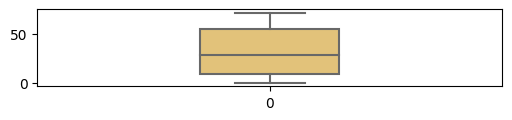

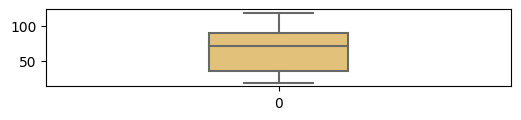

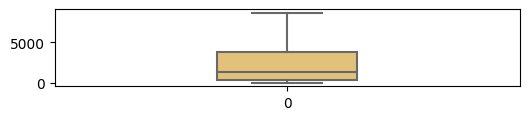

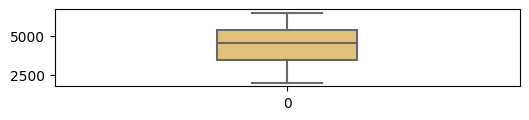

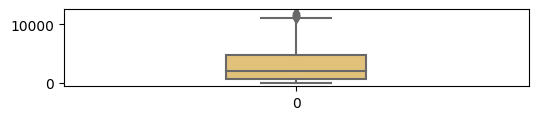

In [ ]:
# outlier detection
def boxplot(num_features):
    plt.figure(figsize=(6,1))
    ax = sns.boxplot(num_features, width=0.3, whis=1.5, color="#f3c969")
    ax.xaxis.labelpad=10
boxplot(tenure)
boxplot(monthly_charges)
boxplot(total_charges)
boxplot(cltv)
boxplot(total_revenue) # contains outliers --> use Standard Scaler

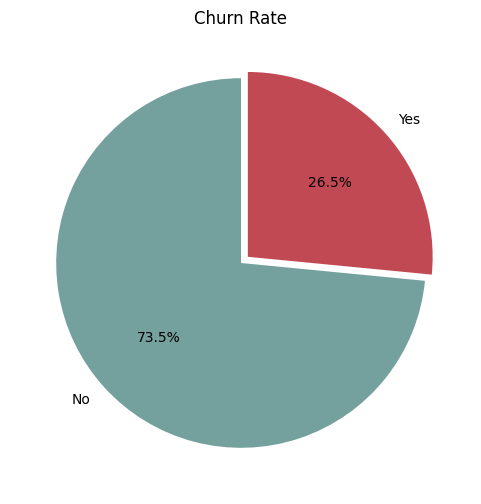

In [ ]:
# target variable - churn rate
plt.figure(figsize=(6,6))
plt.pie(df["Churn"].value_counts(),shadow=False,startangle=90,
        labels=df["Churn"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.05),colors=['#74a09e','#c14953'])
plt.title('Churn Rate')
plt.show()

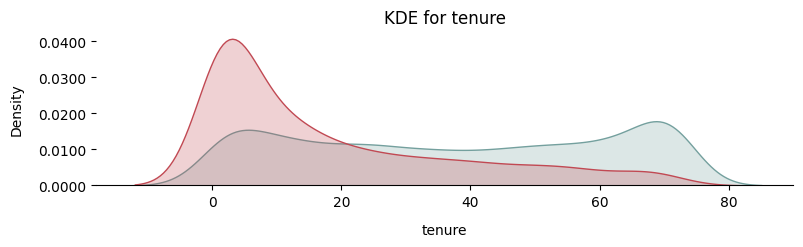

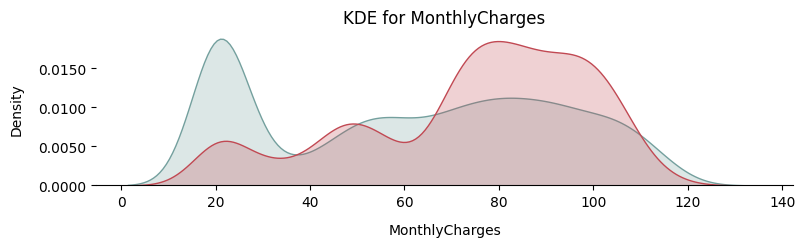

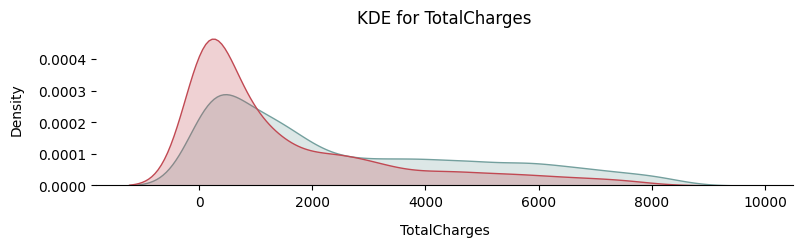

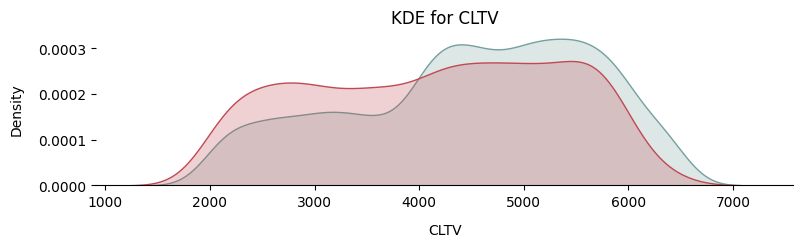

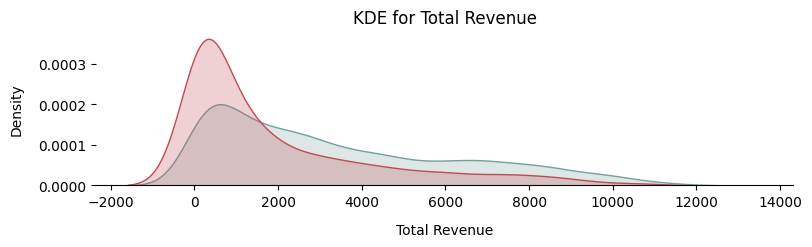

In [ ]:
# KDEplots for numeric features
def kdeplot(feature):
    plt.figure(figsize=(9,2))
    plt.title("KDE for {}".format(feature))
    # plt.tight_layout(pad=1.2)
    ax_kde = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= '#74a09e', label= 'Churn: No', shade='True')
    ax_kde = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= "#c14953", label= 'Churn: Yes', shade='True')
    ax_kde.yaxis.labelpad=10
    ax_kde.xaxis.labelpad=10
    ax_kde.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))
    sns.despine(left="True")
kdeplot("tenure")
kdeplot("MonthlyCharges")
kdeplot ("TotalCharges")
kdeplot("CLTV")
kdeplot("Total Revenue")


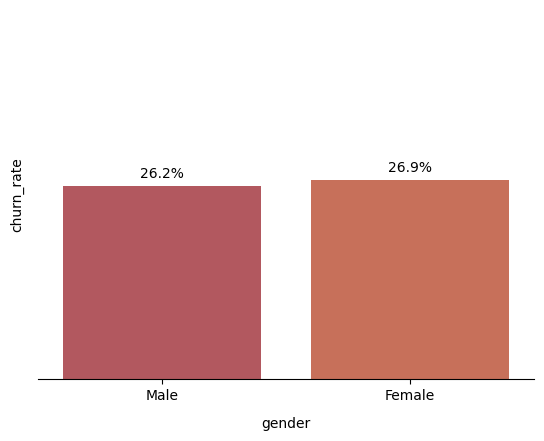

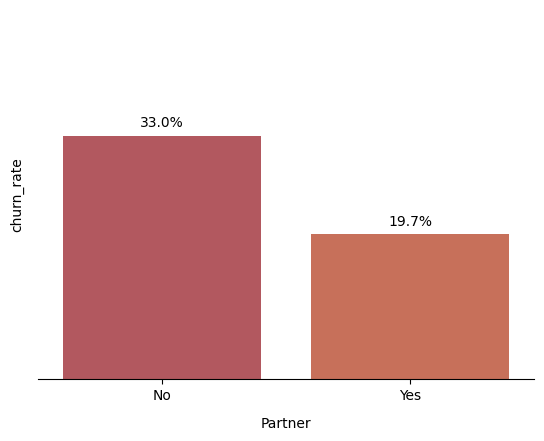

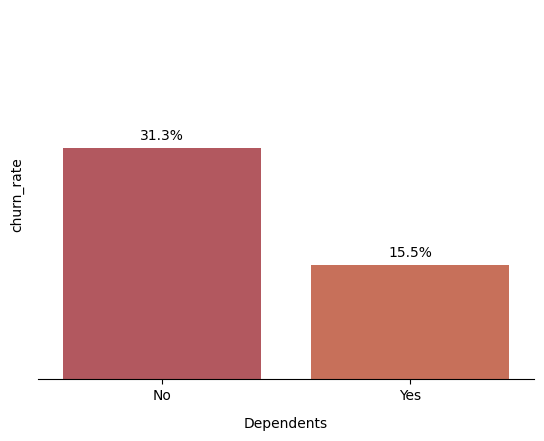

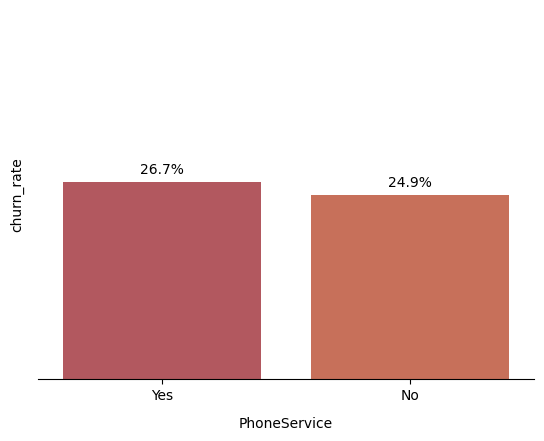

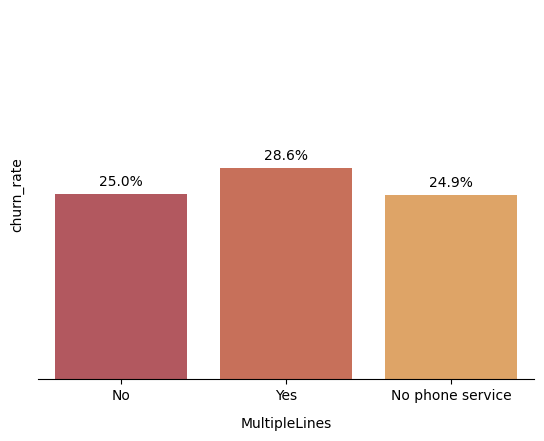

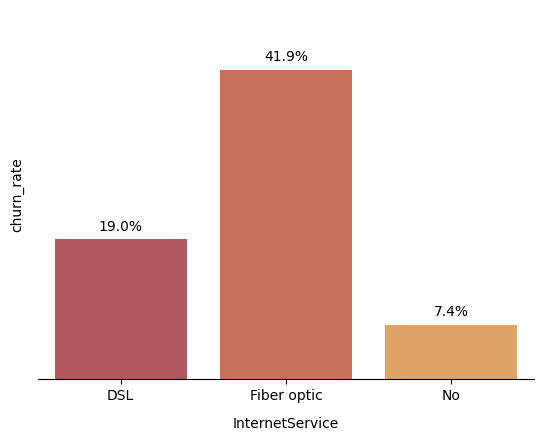

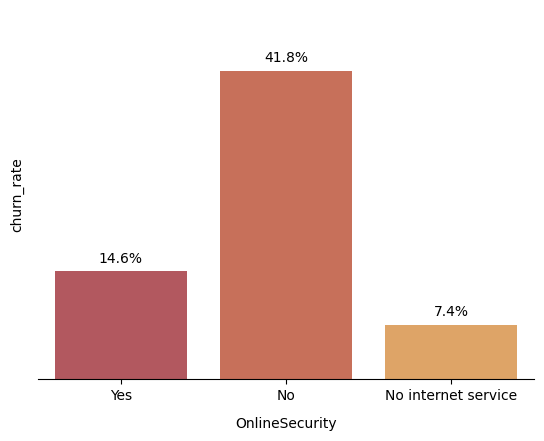

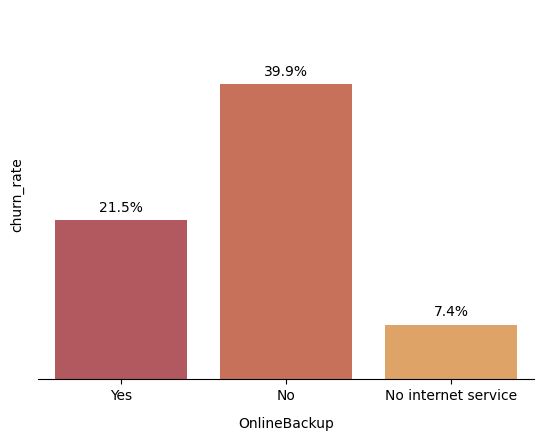

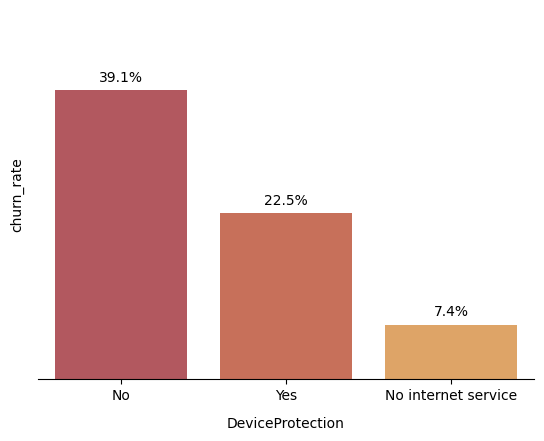

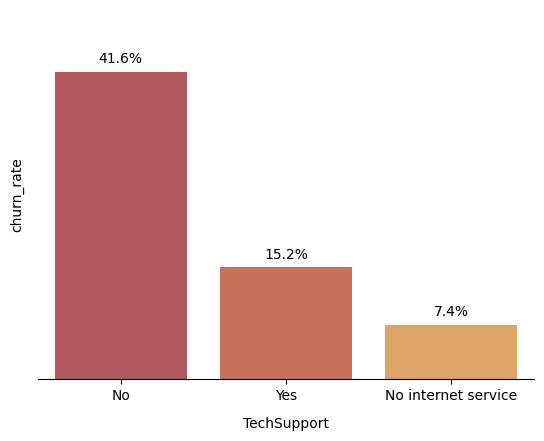

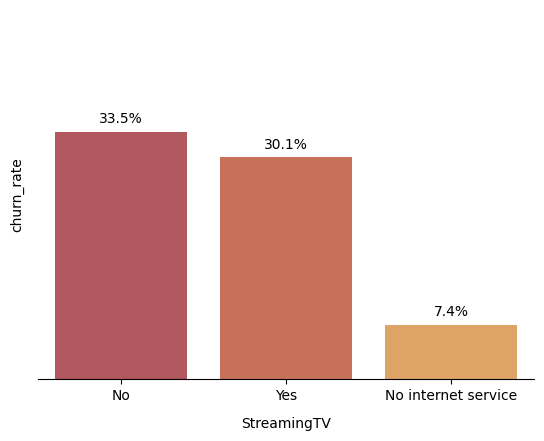

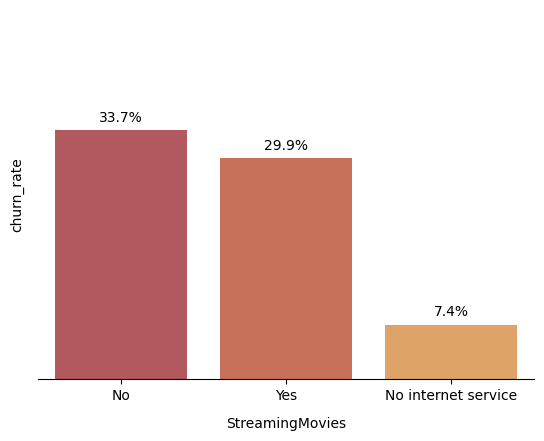

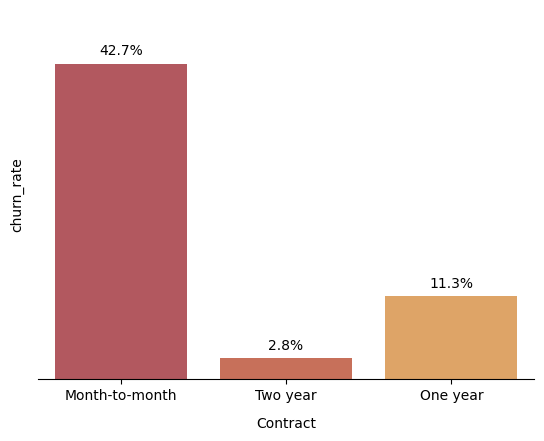

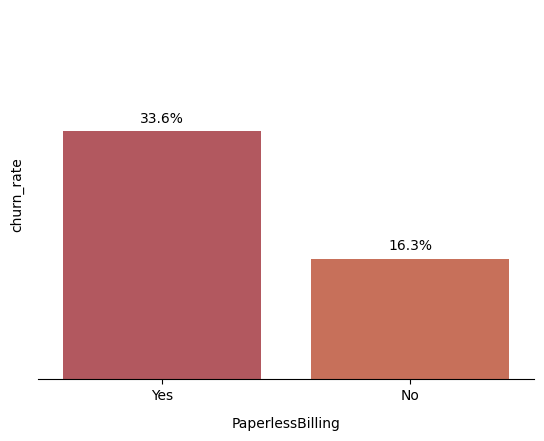

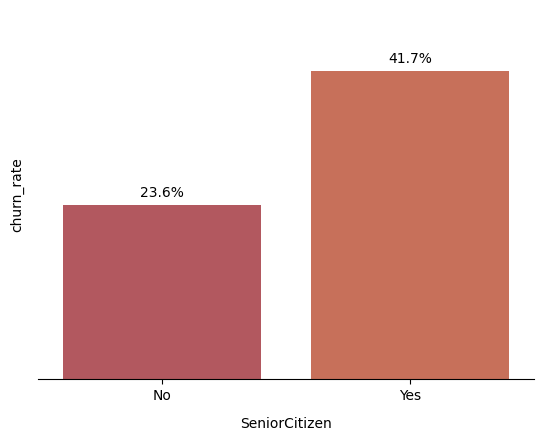

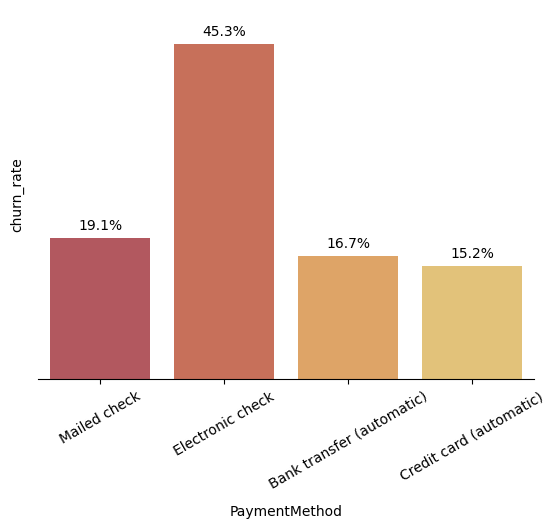

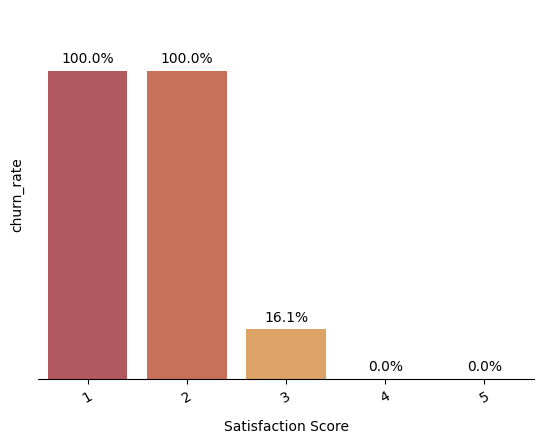

In [ ]:
# barplots for categorical features

def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    sns.despine(left="True")
    ax_bar.set_ylim(0, 0.50)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
barplot("gender")
barplot("Partner")
barplot("Dependents")
barplot("PhoneService")
barplot("MultipleLines")
barplot("InternetService")
barplot("OnlineSecurity")
barplot("OnlineBackup")
barplot("DeviceProtection")
barplot("TechSupport")
barplot("StreamingTV")
barplot("StreamingMovies")
barplot("Contract")
barplot("PaperlessBilling")

# senior citizen
def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    ax_bar.set_xticklabels(["No","Yes"])
    sns.despine(left="True")
    ax_bar.set_ylim(0, 0.50)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
barplot("SeniorCitizen")

# payment method
def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    sns.despine(left="True")
    ax_bar.set_ylim(0, 0.50)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(),rotation=30)
barplot("PaymentMethod")


# satisfaction score
def barplot(feature):
    plt.figure()
    ax_bar = sns.barplot(x=feature, y="churn_rate", data=df, ci=0,
                         palette=customPalette, saturation=0.75)
    for p in ax_bar.patches:
        ax_bar.annotate(format(p.get_height(), '.1%'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    ax_bar.yaxis.labelpad=10
    ax_bar.xaxis.labelpad=10
    sns.despine(left="True")
    ax_bar.set_ylim(0, 1.2)
    ax_bar.set_yticklabels(['{:,.0%}'.format(x) for x in ax_bar.get_yticks()])
    ax_bar.yaxis.set_ticks([])
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(),rotation=30)
barplot("Satisfaction Score")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Telco_customer_churn.csv")

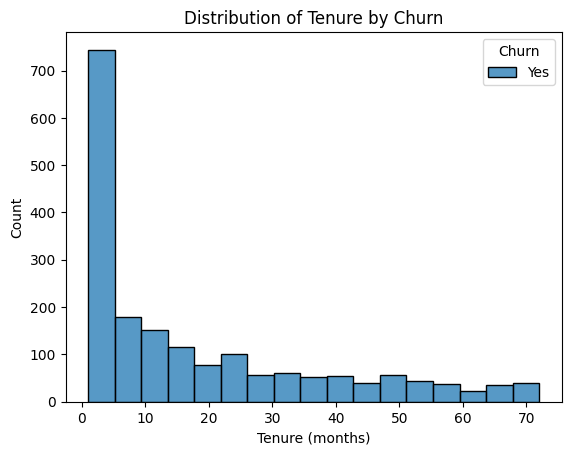

In [ ]:
sns.histplot(df, x='tenure', hue='Churn', multiple='stack')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

<ipython-input-9-33705c300fac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


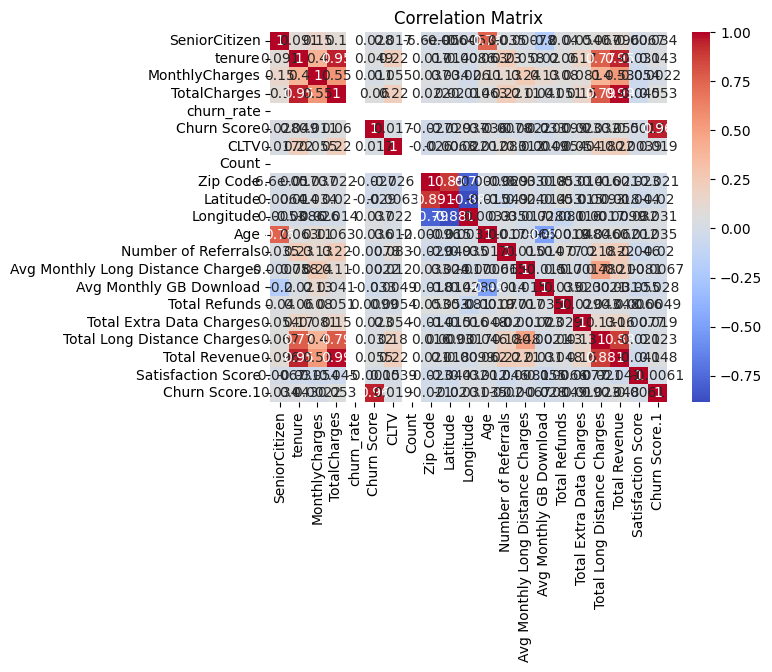

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()